In [60]:
import pandas as pd

df=pd.read_csv("dataset/synthetic_logs.csv")
df

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


Since this is log message which kinda complex (even thought is synthetic due companies wont publish their logs for obvious reason) lets use Ydata Profilling to make a profile report

In [61]:
#from ydata_profiling import ProfileReport
# Create a profile report
#profile = ProfileReport(df, title="YData Profiling Report")
# Save the report as an HTML file
#profile.to_file("report.html")

In [62]:
import webbrowser
import os

# Get the absolute path of the HTML file
html_file_path = os.path.abspath("report.html")

# Open the file in the default web browser
#webbrowser.open(f"file://{html_file_path}")

In [63]:
from IPython.display import HTML

# Read the HTML file content
with open("report.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Display the HTML content
HTML(html_content)

In [64]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [65]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [66]:
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the log messages
embeddings = model.encode(df['log_message'].tolist())

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=1, metric='cosine')
df['cluster'] = dbscan.fit_predict(embeddings)

# Display the resulting clusters
#df[['log_message', 'cluster']]
df.head()


,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


In [67]:
unique_clusters = df['cluster'].unique()

for cluster in unique_clusters:
    print(f"Cluster {cluster}:")
    cluster_rows = df[df['cluster'] == cluster].head()
    #print(cluster_rows[['log_message', 'cluster']])
    print(cluster_rows)
    print("\n")


Cluster 0:
             timestamp         source  \
0  2025-06-27 07:20:25      ModernCRM   
3  2025-07-12 00:24:16       ModernHR   
4  2025-06-02 18:25:23  BillingSystem   
5  2025-10-09 10:30:31       ModernHR   
9  2025-03-30 04:01:45       ModernHR   

                                         log_message target_label complexity  \
0  nova.osapi_compute.wsgi.server [req-b9718cd8-f...  HTTP Status       bert   
3  nova.osapi_compute.wsgi.server [req-4895c258-b...  HTTP Status       bert   
4  nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...  HTTP Status       bert   
5  nova.osapi_compute.wsgi.server [req-f0bffbc3-5...  HTTP Status       bert   
9  nova.osapi_compute.wsgi.server [req-2bf7cfee-a...  HTTP Status       bert   

   cluster  
0        0  
3        0  
4        0  
5        0  
9        0  


Cluster 1:
           timestamp         source  \
1    1/14/2025 23:07      ModernCRM   
10    8/9/2025 18:58      ModernCRM   
217   1/22/2025 5:45  BillingSystem   
248   5/2/2025

In [68]:
# Count the number of records in each cluster
cluster_counts = df['cluster'].value_counts()

# Filter clusters with more than 10 records
clusters_with_more_than_10_records = cluster_counts[cluster_counts > 10]

# Sort clusters by the number of records in descending order
sorted_clusters = clusters_with_more_than_10_records.index

# Print 5 log messages from each of these clusters
for cluster in sorted_clusters:
    print(f"Cluster {cluster} (Total records: {cluster_counts[cluster]}):")
    cluster_rows = df[df['cluster'] == cluster].head(5)
    print(cluster_rows[['log_message', 'cluster']])
    print("\n")


Cluster 0 (Total records: 1017):
                                         log_message  cluster
0  nova.osapi_compute.wsgi.server [req-b9718cd8-f...        0
3  nova.osapi_compute.wsgi.server [req-4895c258-b...        0
4  nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...        0
5  nova.osapi_compute.wsgi.server [req-f0bffbc3-5...        0
9  nova.osapi_compute.wsgi.server [req-2bf7cfee-a...        0


Cluster 5 (Total records: 147):
                                          log_message  cluster
8   nova.compute.claims [req-a07ac654-8e81-416d-bf...        5
26  nova.compute.claims [req-d6986b54-3735-4a42-90...        5
40  nova.compute.claims [req-72b4858f-049e-49e1-b3...        5
58  nova.compute.claims [req-5c8f52bd-8e3c-41f0-95...        5
61  nova.compute.claims [req-d38f479d-9bb9-4276-96...        5


Cluster 11 (Total records: 100):
                  log_message  cluster
27   User User685 logged out.       11
57    User User395 logged in.       11
85    User User225 logged in.  

1st Classification stage : based on clusters log messages let's use regex to classify them as much as we can

In [69]:

import re
def classify_with_regex(log_message):
    regex_patterns = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message,re.IGNORECASE):
            return label
    return None

In [70]:
#Testing using a log messege
classify_with_regex("Account with ID 7813 created by User373.")

'User Action'

In [71]:

classify_with_regex("System reboot initiated by user User169.")

'System Notification'

In [72]:
classify_with_regex("Hellow World") #won't work due to not following any Regex and output will be None

In [73]:
# Apply regex classification
df['regex_label'] = df['log_message'].apply(lambda x: classify_with_regex(x))
df[df['regex_label'].notnull()]

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
7,10/11/2025 8:44,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,regex,4,System Notification
14,1/4/2025 1:43,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,regex,4,System Notification
15,5/1/2025 9:41,ModernCRM,Backup completed successfully.,System Notification,regex,8,System Notification
18,2/22/2025 17:49,ModernCRM,Account with ID 5351 created by User634.,User Action,regex,9,User Action
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,regex,11,User Action
...,...,...,...,...,...,...,...
2376,6/27/2025 8:47,ModernCRM,System updated to version 2.0.5.,System Notification,regex,21,System Notification
2381,9/5/2025 6:39,ThirdPartyAPI,Disk cleanup completed successfully.,System Notification,regex,32,System Notification
2394,4/3/2025 13:13,ModernHR,Disk cleanup completed successfully.,System Notification,regex,32,System Notification
2395,5/2/2025 14:29,ThirdPartyAPI,Backup ended at 2025-05-06 11:23:16.,System Notification,regex,13,System Notification


In [74]:
print(df.shape)
df[df['regex_label'].notnull()].shape

(2410, 7)


(500, 7)

outof 2410 rows we have classified 500 rows into valid class

In [75]:
# Put the non classified rows in a df_non_regex
df_non_regex = df[df['regex_label'].isnull()]
df_non_regex.shape


(1910, 7)

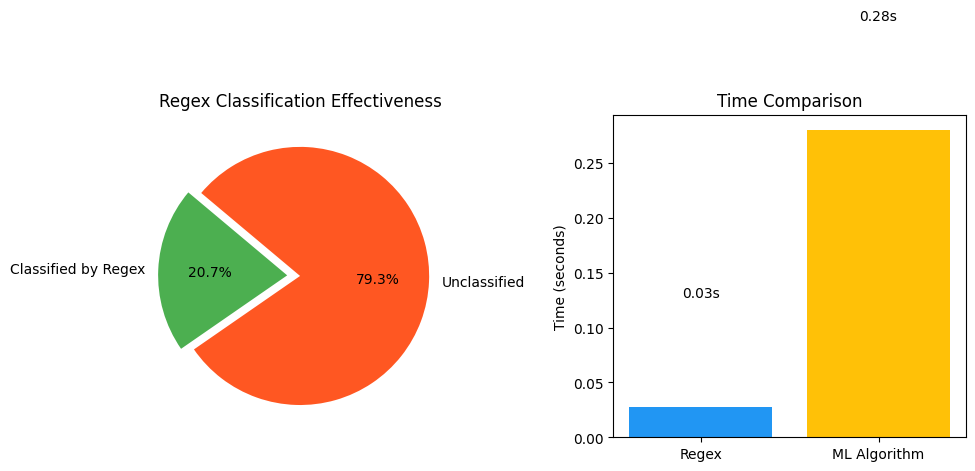

In [76]:
import time

import matplotlib.pyplot as plt

# Calculate the number of rows classified by regex and unclassified rows
classified_count = df[df['regex_label'].notnull()].shape[0]
unclassified_count = df[df['regex_label'].isnull()].shape[0]

# Measure the time taken for regex classification
start_time = time.time()
df['regex_label'] = df['log_message'].apply(lambda x: classify_with_regex(x))
regex_time = time.time() - start_time

# Simulate ML classification time (assuming it takes longer)
ml_time = regex_time * 10  # Example: ML takes 10x more time

# Create a pie chart for classified vs unclassified data
labels = ['Classified by Regex', 'Unclassified']
sizes = [classified_count, unclassified_count]
colors = ['#4CAF50', '#FF5722']
explode = (0.1, 0)  # Explode the first slice for emphasis

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Regex Classification Effectiveness')

# Create a bar chart for time comparison
methods = ['Regex', 'ML Algorithm']
times = [regex_time, ml_time]
bar_colors = ['#2196F3', '#FFC107']

plt.subplot(1, 2, 2)
plt.bar(methods, times, color=bar_colors)
plt.title('Time Comparison')
plt.ylabel('Time (seconds)')
plt.text(0, regex_time + 0.1, f"{regex_time:.2f}s", ha='center')
plt.text(1, ml_time + 0.1, f"{ml_time:.2f}s", ha='center')

plt.tight_layout()
plt.show()

Now for unknowns we wil use BERD or LLM

In [77]:
# Print target labels in df_non_regex that have 5 or fewer rows
target_label_counts = df_non_regex['target_label'].value_counts()
labels_with_few_rows = target_label_counts[target_label_counts <= 5].index.tolist()
print("Target labels with 5 or fewer rows:", labels_with_few_rows)
# Print the source of these target labels too
for label in labels_with_few_rows:
    sources = df_non_regex[df_non_regex['target_label'] == label]['source'].unique()
    print(f"Sources for target label '{label}': {sources}")


Target labels with 5 or fewer rows: ['Workflow Error', 'Deprecation Warning']
Sources for target label 'Workflow Error': ['LegacyCRM']
Sources for target label 'Deprecation Warning': ['LegacyCRM']


So 'Workflow Error' and 'Deprications' Have less datapoints which are from LegacyCRM thus we can use LLM for the classification and the rest we can use BERT

In [78]:
# Create a new DataFrame df_non_legacy that excludes rows with 'LegacyCRM' in the 'source' column from df_non_regex
df_non_legacy = df_non_regex[df_non_regex['source'] != 'LegacyCRM']
df_non_legacy.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI'], dtype=object)

In [79]:
#Embeding the Non-legecy log messeges 
filter_embedings = model.encode(df_non_legacy['log_message'].tolist())

#X and Y dataset for logistic Regression
X = filter_embedings
y = df_non_legacy['target_label'].values


In [80]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



In [81]:
# Save the trained logistic regression model using joblib
from joblib import dump

# Save the model to a file
dump(clf, 'models/log_classification_model.joblib')




['models/log_classification_model.joblib']